**Doug Branton  
Astro 425  
Homework 3**  

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
from scipy.integrate import quad

# Problem 1

Our goal is to derive the third Friedman equation:

$$\dot{\epsilon (t)}+\frac{3\dot{a(t)}}{a(t)}(\epsilon +P) = 0$$

From the first two Friedman equations:

$$\frac{ \ddot{a(t)}}{a(t)} = -\frac{4\pi G}{3c^2}[\epsilon (t) + 3P(t)]$$

$$\left(\frac{ \dot{a(t)}}{a(t)}\right)^2 =\frac{8\pi G \epsilon (t)}{3c^2}-\frac{kc^2}{a(t)^2}$$

First, we take the derivative of the second equation:

$$2\dot{a(t)}\ddot{a(t)}= \frac{8\pi G \dot{ \epsilon (t)} a(t)^2}{3c^2} + \frac{16\pi G \epsilon (t) a(t) \dot{a(t)}}{3c^2}$$

Solve for $\ddot{a(t)}$:

$$\ddot{a(t)}= \frac{4\pi G \dot{ \epsilon (t)} a(t)^2}{3c^2 \dot{a(t)}}+ \frac{8\pi G \epsilon (t) a(t)}{3c^2}$$

Now we rearrange the first equation and plug in our expression for $\ddot{a(t)}$:

$$\frac{4\pi G \dot{ \epsilon (t)} a(t)^2}{3c^2 \dot{a(t)}}+ \frac{8\pi G \epsilon (t) a(t)}{3c^2} = -\frac{4\pi G a(t)}{3c^2}[\epsilon (t) + 3P(t)]$$

Cancel out common factors:

$$\frac{ \dot{\epsilon (t)} a(t)}{\dot{a(t)}}+2\epsilon (t) = - \epsilon (t) - 3P(t)$$

Move all terms to one side and multiply by $\frac{\dot{a(t)}}{a(t)}$ and we are left with the third Friedman equation.

$$\dot{\epsilon (t)}+\frac{3\dot{a(t)}}{a(t)}(\epsilon +P) = 0$$



# Problem 2

Our goal is to numerically integrate the Friedman equation,

$$\left(\frac{H(z)}{H_0}\right)^2 = (\Omega_{r,0}(1+z)^4 + \Omega_{m,0}(1+z)^3 + \Omega_{\Lambda,0}+(1-\Omega_{0})(1+z)^2)$$

And to also calculate and plot the comoving distance and the age of the universe from z=0 to z=10 of a flat universe and a closed universe.

The comoving distance is defined with respect to redshift as follows:

$$r= \int_0^z\! \frac{c \, \mathrm{d}z}{H(z)}$$

The age of the universe can be calculated from the relation:

$$\frac{\mathrm{d}z}{\mathrm{d}t}=\frac{H(z)}{a(t)}$$

This differential equation is separable, and we can change the scale factor into an expression of redshift:

$$\frac{\mathrm{d}z}{(1+z)H(z)}=\mathrm{d}t$$

Integrating both sides we find:

$$\int_0^z\! \frac{\mathrm{d}z}{(1+z)H(z)}= t_o-t_e$$

Where $t_0-t_e$ yields an age of the universe.

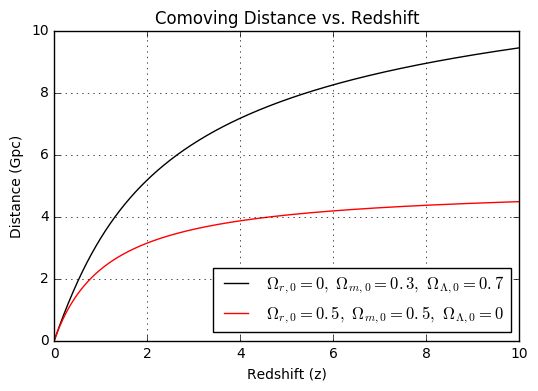

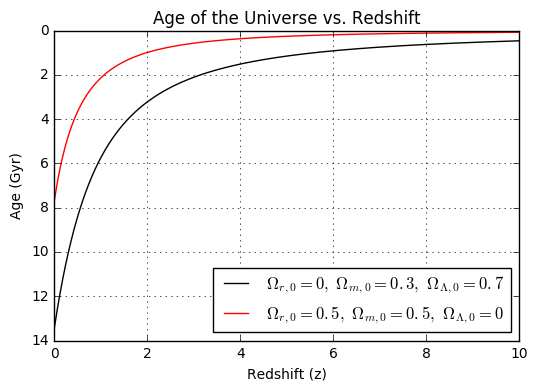

In [3]:
#Relevant Constants
H0=70*u.km/(u.second*u.megaparsec)
H0_s=(H0.to(1/u.second)).value
H0_Gyr=(H0.to(1/u.gigayear)).value
c=(const.c).value

#Friedman Equation
def H_z(H0, omega_r0, omega_m0, omega_cc, omega_0, z):
    return H0 * np.sqrt(omega_r0 * (1.0 + z) ** 4 + omega_m0 * (1.0 + z) ** 3 + omega_cc + (1.0 - omega_0) * (1.0 + z) ** 2)
##Comoving Distance
flat_univ_r= lambda z: c/H_z(H0_s,0,0.3,0.7,1.0,z) #Parameters for a flat universe
closed_univ_r= lambda z: c/H_z(H0_s,0.5,0.5,0.0,1.0,z) #Parameters for a closed universe
z_space=np.linspace(0,10,1000)

#Numerical Integration using scipy.quadrature

flat_dat_r=[]
closed_dat_r=[]
for z in z_space:
    flat_r=quad(flat_univ_r,0,z)
    flat_r=((flat_r*u.m).to(u.gigaparsec)).value
    flat_dat_r.append(flat_r[0])
    closed_r=quad(closed_univ_r,0,z)
    closed_r=((closed_r*u.m).to(u.gigaparsec)).value
    closed_dat_r.append(closed_r[0])
    
#Comoving Distance Plot
plt.plot(z_space,flat_dat_r,color='k', label=r"$\Omega_{r,0}=0,\ \Omega_{m,0}=0.3,\ \Omega_{\Lambda,0}=0.7$")
plt.plot(z_space,closed_dat_r,color='r', label=r"$\Omega_{r,0}=0.5,\ \Omega_{m,0}=0.5,\ \Omega_{\Lambda,0}=0$")
plt.ylabel("Distance (Gpc)")
plt.xlabel("Redshift (z)")
plt.title("Comoving Distance vs. Redshift")
plt.grid(True)

plt.legend(loc=4)
    
##Age of the Universe
flat_univ_t= lambda z: 1.0/((1.0+z)*H_z(H0_s,0,0.3,0.7,1.0,z)) #Parameters for a flat universe
closed_univ_t= lambda z: 1.0/((1.0+z)*H_z(H0_s,0.5,0.5,0.0,1.0,z)) #Parameters for a closed universe

Age_now_flat=quad(flat_univ_t,0,10000)[0] #Approximate current age using z=10000
Age_now_closed=quad(closed_univ_t,0,10000)[0] #Approximate current age using z=10000
Age_now_flat=(Age_now_flat*u.s).to(u.gigayear).value
Age_now_closed=(Age_now_closed*u.s).to(u.gigayear).value                            
flat_dat_t=[]
closed_dat_t=[]
for z in z_space:
    flat_t=quad(flat_univ_t,0,z)
    flat_t=((flat_t*u.s).to(u.gigayear)).value
    flat_dat_t.append(Age_now_flat-flat_t[0])
    closed_t=quad(closed_univ_t,0,z)
    closed_t=((closed_t*u.s).to(u.gigayear)).value
    closed_dat_t.append(Age_now_closed-closed_t[0])
#Age of the Universe Plot
plt.figure(2)

plt.plot(z_space,flat_dat_t, color='k', label=r"$\Omega_{r,0}=0,\ \Omega_{m,0}=0.3,\ \Omega_{\Lambda,0}=0.7$")
plt.plot(z_space, closed_dat_t, color='r', label=r"$\Omega_{r,0}=0.5,\ \Omega_{m,0}=0.5,\ \Omega_{\Lambda,0}=0$")

plt.grid(True)
plt.xlabel("Redshift (z)")
plt.ylabel("Age (Gyr)")
plt.title("Age of the Universe vs. Redshift")
plt.legend(loc=4)
plt.gca().invert_yaxis() #stylistic, keep legend in bottom right

# Problem 3.

Our goal is to find the radiation parameter $\Omega_{r,0}$ for which the age of our "benchmark" flat universe is equivalent to the age of the radiation dominated open universe. We can accomplish this by incrementing $\Omega_{r,0}$ from 0 until this condition is met.

In [26]:
omega_r0=0.0

open_univ_t=lambda z: 1.0/((1.0+z)*H_z(H0_Gyr,omega_r0,0.0,0.0,omega_r0,z)) #Parameters for an open universe
Age_now_open=quad(open_univ_t,0,10000)[0]

while Age_now_open >= Age_now_flat:
    omega_r0+=0.00001
    open_univ_t=lambda z: 1.0/((1.0+z)*H_z(H0_Gyr,omega_r0,0.0,0.0,omega_r0,z)) #Parameters for an open universe
    Age_now_open=quad(open_univ_t,0,10000)[0]

print "Age of 'Benchmark' flat universe: ",str(Age_now_flat)
print "Age of open universe: ",str(Age_now_open)
print "Radiation density at age of open universe:",str(omega_r0)

Age of 'Benchmark' flat universe:  13.4669669476
Age of open universe:  13.4663947602
Radiation density at age of open universe: 0.00139
